# Carbon-13 NMR Spectroscopy Analysis

## Understanding $^{13}C$-NMR Spectroscopy

### Chemical Shift in Carbon-13 NMR
- **$^{13}C$-NMR** provides information about the **carbon framework** of a molecule.
- Carbon chemical shifts span a **much wider range** (0-220 ppm) compared to proton NMR (0-12 ppm).
- **Electronegative atoms** and **hybridization** strongly affect carbon chemical shifts:
  - **sp³ carbons (alkanes)**: 0-50 ppm
  - **sp² carbons (alkenes, aromatics)**: 100-150 ppm
  - **Carbonyl carbons (C=O)**: 160-220 ppm

### Key Differences from $^{1}H$-NMR
- **Lower natural abundance**: Only ~1.1% of carbon is $^{13}C$ (vs. 99.98% for $^{1}H$)
- **Broader chemical shift range**: 0-220 ppm (vs. 0-12 ppm for protons)
- **No coupling between carbons**: $^{13}C$-$^{13}C$ coupling is rare due to low abundance
- **Proton decoupling**: Usually run decoupled to simplify spectra (one peak per unique carbon)

### Chemical Shift Formula
$$
\delta = \frac{\nu_{\text{sample}} - \nu_{\text{reference}}}{\nu_{\text{reference}}} \times 10^6
$$

where the reference is typically **TMS (tetramethylsilane)** at 0 ppm.

## Carbon-13 Chemical Shift Ranges

The following ranges help identify different types of carbon environments:

| Carbon Type | Chemical Shift (ppm) | Examples |
|-------------|---------------------|----------|
| Alkyl (sp³ C-H) | 0-50 | CH₃, CH₂, CH |
| C-O, C-N (sp³) | 50-90 | Alcohols, ethers, amines |
| Alkyne (sp C) | 65-85 | C≡C |
| Alkene (sp² C=C) | 100-150 | C=C |
| Aromatic (sp²) | 110-160 | Benzene rings |
| Carbonyl (C=O) | 160-220 | Ketones, aldehydes, esters, acids |

# Setup and Import Libraries

Import necessary libraries and functions for Carbon-13 NMR analysis.

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os 
from importlib import reload

# Make the project root importable and import your module
from pathlib import Path
import sys
project_root = Path.cwd().parent  # ...\NMR-Project
if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))

from functions import nmr_function as nmr
print("Imported nmr from:", nmr.__file__)

Imported nmr from: c:\Users\Windows User\NMR-Project\functions\nmr_function.py


# Define Carbon-13 Chemical Shift Ranges

Define the PPM shift correlations specific to Carbon-13 NMR. These ranges are significantly different from proton NMR and span 0-220 ppm.

In [49]:
# Carbon-13 specific PPM shift ranges (updated for better peak identification)
# Note: TMS (tetramethylsilane) is the reference at 0 ppm, but may appear from -0.5 to +0.5
C13_PPM_SHIFTS = {
    "TMS Reference (CH₃)₄Si": "0-2ppm",  # TMS reference region
    "Alkyl (sp³ CH3/CH2/CH)": "5-50ppm",
    "Quaternary C (R₄C)": "30-50ppm",
    "C-Halogen (C-Cl, C-Br)": "30-80ppm",
    "C-O, C-N (alcohols, ethers, amines)": "50-90ppm",
    "Alkyne (sp C≡C)": "65-85ppm",
    "Alkene (sp² C=C)": "100-150ppm",
    "Aromatic (sp² Ar-C)": "110-160ppm",
    "Nitrile (C≡N)": "115-125ppm",
    "Carbonyl Ester/Amide (C=O)": "160-180ppm",
    "Carbonyl Ketone/Aldehyde (C=O)": "180-215ppm",
    "Carboxylic Acid (COOH)": "170-185ppm"
}

print("Carbon-13 Chemical Shift Ranges:")

for group, ppm_range in C13_PPM_SHIFTS.items():    print(f"  {group}: {ppm_range}")

Carbon-13 Chemical Shift Ranges:
  TMS Reference (CH₃)₄Si: 0-2ppm
  Alkyl (sp³ CH3/CH2/CH): 5-50ppm
  Quaternary C (R₄C): 30-50ppm
  C-Halogen (C-Cl, C-Br): 30-80ppm
  C-O, C-N (alcohols, ethers, amines): 50-90ppm
  Alkyne (sp C≡C): 65-85ppm
  Alkene (sp² C=C): 100-150ppm
  Aromatic (sp² Ar-C): 110-160ppm
  Nitrile (C≡N): 115-125ppm
  Carbonyl Ester/Amide (C=O): 160-180ppm
  Carbonyl Ketone/Aldehyde (C=O): 180-215ppm
  Carboxylic Acid (COOH): 170-185ppm


# Load Carbon-13 FID Data

Load the Free Induction Decay (FID) data for a Carbon-13 NMR experiment. We'll use one of the available carbon FID files from the data directory.

In [50]:
reload(nmr)

# Load Carbon-13 FID data
# Using local file path (data folder exists locally but not in GitHub repo yet)
# Option 1: 18_03_30_dextacet_13C_FID.asc
# Option 2: 18_05_18_dextraacet_13C.1.asc
# Option 3: krishna_data/25_11_26_ValerianFrac2_13C_FID.asc

local_path = r"data/correctly_processed_fid/18_03_30_dextacet_13C_FID.asc"
df, name = nmr.load_fid_and_preview(local_path)

# Ensure array for downstream cells
data = df if isinstance(df, np.ndarray) else df.to_numpy()
print(f"\nLoaded: {name}")
print(f"Data shape: {data.shape}")

          X          Real     Imaginary
0  0.000000  7.780900e-10 -3.371710e-09
1  0.000032  1.278344e-04  1.835575e-04
2  0.000064  4.036882e-03 -4.395042e-03
3  0.000096  4.171608e-02 -5.820043e-04
4  0.000127  3.018214e-03  1.324561e-02

Loaded: 18_03_30_dextacet_13C_FID
Data shape: (32768, 3)


Loaded: 18_03_30_dextacet_13C_FID
Data shape: (32768, 3)


# Plot Free Induction Decay (FID)

Visualize the time-domain FID signal before Fourier transformation. The FID represents the raw NMR signal decay over time.

# 🧠 Apply Deep Learning Denoising (Optional)

Apply the trained deep learning model to enhance the FID signal before analysis.

In [51]:
# SET THIS FLAG TO ENABLE/DISABLE DENOISING
USE_DENOISING = True  # Set to False to skip denoising

if USE_DENOISING:
    import torch
    import torch.nn as nn
    import torch.nn.functional as F
    
    # Define the denoiser architecture
    class DilatedResBlock(nn.Module):
        def __init__(self, channels: int, dilation: int = 1, k: int = 11):
            super().__init__()
            pad = dilation * ((k - 1) // 2)
            self.conv1 = nn.Conv1d(channels, channels, k, padding=pad, dilation=dilation)
            self.conv2 = nn.Conv1d(channels, channels, k, padding=pad, dilation=dilation)
        def forward(self, x):
            h = F.relu(self.conv1(x))
            h = self.conv2(h)
            return F.relu(x + h)
    
    class DenoiseNetPhysics(nn.Module):
        def __init__(self, in_ch=2, hidden=64, k=11, dilations=(1,2,4,8,16,32)):
            super().__init__()
            self.inp = nn.Conv1d(in_ch, hidden, k, padding=(k-1)//2)
            self.blocks = nn.Sequential(*[DilatedResBlock(hidden, d, k) for d in dilations])
            self.out = nn.Conv1d(hidden, in_ch, k, padding=(k-1)//2)
        def forward(self, x):
            h = F.relu(self.inp(x))
            h = self.blocks(h)
            return x + self.out(h)
    
    # Load model
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    denoiser_model = DenoiseNetPhysics().to(device)
    
    # Try loading checkpoint
    checkpoint_dir = Path("checkpoints")
    best_models = ["DenoiseNetPhysics_final_best.pth", "DenoiseNetPhysics_aggressive_best.pth",
                   "DenoiseNetPhysics_extended_best.pth", "DenoiseNetPhysics_finetuned_best.pth"]
    
    loaded = False
    for ckpt_name in best_models:
        ckpt_path = checkpoint_dir / ckpt_name
        if ckpt_path.exists():
            try:
                ckpt = torch.load(ckpt_path, map_location=device, weights_only=False)
                denoiser_model.load_state_dict(ckpt['model_state'] if 'model_state' in ckpt else ckpt)
                print(f"✅ Loaded: {ckpt_name}")
                loaded = True
                break
            except: continue
    
    if loaded:
        denoiser_model.eval()
        # Apply denoising
        data_original = data.copy()
        real_part, imag_part = data[:, 1].astype(np.float32), data[:, 2].astype(np.float32)
        sig = np.stack([real_part, imag_part])
        
        # Normalize
        L = sig.shape[1]
        late = slice(int(0.8*L), L)
        baseline = np.median(sig[:, late], axis=1, keepdims=True)
        sig_norm = sig - baseline
        
        # Denoise
        with torch.no_grad():
            x = torch.from_numpy(sig_norm).unsqueeze(0).to(device)
            y = denoiser_model(x).cpu().squeeze(0).numpy()
        
        # Update data
        data[:, 1] = (y[0] + baseline[0, 0])
        data[:, 2] = (y[1] + baseline[1, 0])
        
        # Calculate SNR
        def calc_snr(d):
            env = np.sqrt(d[:,1]**2 + d[:,2]**2)
            s = int(0.2*len(env))
            return 20*np.log10(np.sqrt(np.mean(env[:s]**2)) / (np.sqrt(np.mean(env[-s:]**2))+1e-12))
        
        snr_before, snr_after = calc_snr(data_original), calc_snr(data)
        snr_improvement = snr_after - snr_before
        print(f"   SNR: {snr_before:.1f} → {snr_after:.1f} dB ({snr_improvement:+.1f} dB)")
        print("✅ Using DENOISED data for analysis")
    else:
        print("⚠️  No model loaded - using original data")
        USE_DENOISING = False
else:
    print("Denoising disabled - using original FID")

✅ Loaded: DenoiseNetPhysics_final_best.pth
   SNR: 15.7 → 16.1 dB (+0.4 dB)
✅ Using DENOISED data for analysis
   SNR: 15.7 → 16.1 dB (+0.4 dB)
✅ Using DENOISED data for analysis


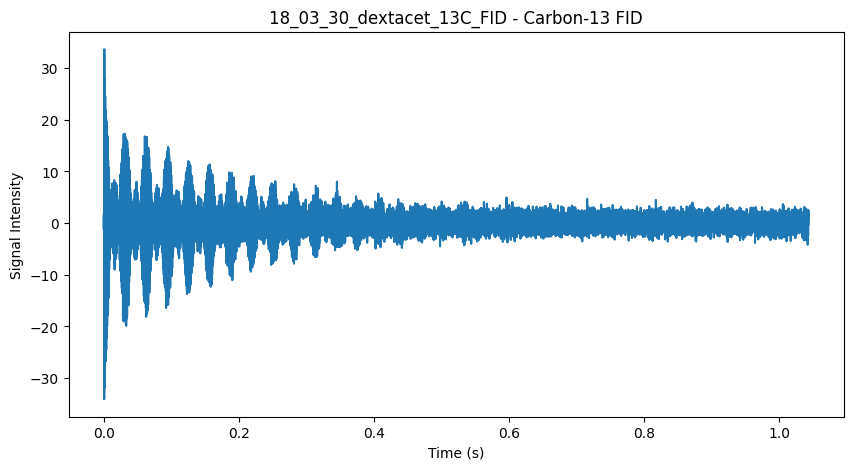

(<Figure size 1000x500 with 1 Axes>,
 <Axes: title={'center': '18_03_30_dextacet_13C_FID - Carbon-13 FID'}, xlabel='Time (s)', ylabel='Signal Intensity'>)

In [52]:
nmr.plot_fid(data, title=f"{name} - Carbon-13 FID", xcol=0, ycol=1, 
             xlabel="Time (s)", ylabel="Signal Intensity", invert_x=False)

# 📊 Optional: Apply Gaussian Smoothing to Spectrum

For Carbon-13 NMR, you can optionally apply additional Gaussian smoothing to the spectrum after FFT. This can help:
- **Reduce high-frequency noise** that may remain after deep learning denoising
- **Smooth out minor artifacts** from FFT processing
- **Improve visual clarity** for peak identification

**Note:** Gaussian filtering is applied in the **frequency domain** (after FFT), while the deep learning denoiser works in the **time domain** (before FFT). They are complementary techniques.

**Recommendation for Carbon-13:**
- If deep learning denoising gives good SNR improvement (+2 dB or more): **Skip Gaussian filtering** to preserve peak shape
- If SNR improvement is modest (<+2 dB) or no denoising used: **Use Gaussian filtering** with sigma=1-3

In [53]:
# SET THIS FLAG TO ENABLE/DISABLE GAUSSIAN SMOOTHING OF SPECTRUM
USE_GAUSSIAN_SMOOTHING = False  # Set to True to apply Gaussian filtering
GAUSSIAN_SIGMA = 2.0  # Smoothing strength (1-3 recommended for C-13)

print(f"Gaussian smoothing: {'ENABLED' if USE_GAUSSIAN_SMOOTHING else 'DISABLED'}")
if USE_GAUSSIAN_SMOOTHING:
    print(f"  Sigma value: {GAUSSIAN_SIGMA}")
    print("  Note: This will be applied after FFT, before peak detection")
else:
    print("  Relying on deep learning denoising only for noise reduction")

Gaussian smoothing: DISABLED
  Relying on deep learning denoising only for noise reduction


# Fourier Transform and Spectrum Analysis

Apply the Fast Fourier Transform (FFT) to convert the time-domain FID into a frequency-domain spectrum.

**Note on DFT vs FFT:** 
- NMR data consists of **discrete** time-domain points, so mathematically we compute a **Discrete Fourier Transform (DFT)**
- **FFT (Fast Fourier Transform)** is an efficient algorithm to compute the DFT (O(N log N) instead of O(N²))
- In practice, all NMR software uses FFT for speed, but it computes the same result as DFT
- The terms are often used interchangeably in NMR literature

## Carbon-13 Spectrometer Frequency
Typical $^{13}C$ spectrometer frequencies are around **100 MHz** (at a field where $^{1}H$ resonates at 400 MHz).

The frequency relationship uses gyromagnetic ratios:
$$\nu_{^{13}C} = \frac{\gamma_{^{13}C}}{\gamma_{^{1}H}} \times \nu_{^{1}H} = \frac{10.71 \text{ MHz/T}}{42.58 \text{ MHz/T}} \times \nu_{^{1}H} \approx 0.2514 \times \nu_{^{1}H}$$

For a 399.78 MHz (proton) instrument, the carbon frequency is **100.52 MHz**.

In [54]:
from scipy.fft import fft, fftfreq, fftshift
from scipy.signal import find_peaks
from scipy.ndimage import gaussian_filter1d

# Carbon-13 spectrometer frequency (MHz) - calculated from proton frequency
# User's instrument: 399.78 MHz (¹H) → ¹³C frequency calculation:
#   γ(¹³C) = 10.71 MHz/T, γ(¹H) = 42.58 MHz/T
#   Ratio: γ(¹³C)/γ(¹H) = 10.71/42.58 = 0.25145020
#   Therefore: 399.78 MHz × 0.25145 = 100.52 MHz (¹³C)
C13_SPECTROMETER_FREQ = 100.52849  # MHz (calculated for 399.78 MHz ¹H instrument)

# Compute FFT spectrum
fft_res = nmr.compute_fft_spectrum(data, window='exp')  
frequencies = fft_res["frequencies"]
magnitude = fft_res["magnitude"]

# Use only positive frequencies (like hydrogen NMR)
positive_frequencies = fft_res["positive_frequencies"]
positive_magnitude = fft_res["positive_magnitude"]

# Apply optional Gaussian smoothing to spectrum (frequency domain)
if USE_GAUSSIAN_SMOOTHING:
    positive_magnitude_original = positive_magnitude.copy()
    positive_magnitude = gaussian_filter1d(positive_magnitude, sigma=GAUSSIAN_SIGMA)
    print(f"✅ Applied Gaussian smoothing (σ={GAUSSIAN_SIGMA}) to spectrum")
else:
    print("No Gaussian smoothing applied to spectrum")

# Build ppm axis for Carbon-13 (positive frequencies only)
ppm_axis = positive_frequencies / C13_SPECTROMETER_FREQ

print(f"Spectrometer frequency: {C13_SPECTROMETER_FREQ} MHz")
print(f"Frequency range: {positive_frequencies.min():.2f} to {positive_frequencies.max():.2f} Hz")
print(f"PPM range: {ppm_axis.min():.2f} to {ppm_axis.max():.2f} ppm")

No Gaussian smoothing applied to spectrum
Spectrometer frequency: 100.52849 MHz
Frequency range: 0.00 to 15702.56 Hz
PPM range: 0.00 to 156.20 ppm


# Peak Detection with Carbon-13 Specific Thresholds

Carbon-13 NMR peaks are typically:
- **Weaker** than proton NMR (due to lower natural abundance)
- **Sharper** when proton-decoupled
- **More widely spaced** (larger ppm range)

We'll use adjusted thresholds for peak detection suitable for Carbon-13 spectra.

Identified functional groups:
The Peak at 22.34 ppm corresponds to a Alkyl (sp³ CH3/CH2/CH)
The Peak at 22.37 ppm corresponds to a Alkyl (sp³ CH3/CH2/CH)
The Peak at 22.39 ppm corresponds to a Alkyl (sp³ CH3/CH2/CH)
The Peak at 22.59 ppm corresponds to a Alkyl (sp³ CH3/CH2/CH)
The Peak at 22.90 ppm corresponds to a Alkyl (sp³ CH3/CH2/CH)
The Peak at 23.22 ppm corresponds to a Alkyl (sp³ CH3/CH2/CH)
The Peak at 23.39 ppm corresponds to a Alkyl (sp³ CH3/CH2/CH)
The Peak at 23.47 ppm corresponds to a Alkyl (sp³ CH3/CH2/CH)
The Peak at 23.54 ppm corresponds to a Alkyl (sp³ CH3/CH2/CH)
Graph automatically zoomed to range: 22.24–23.64 ppm


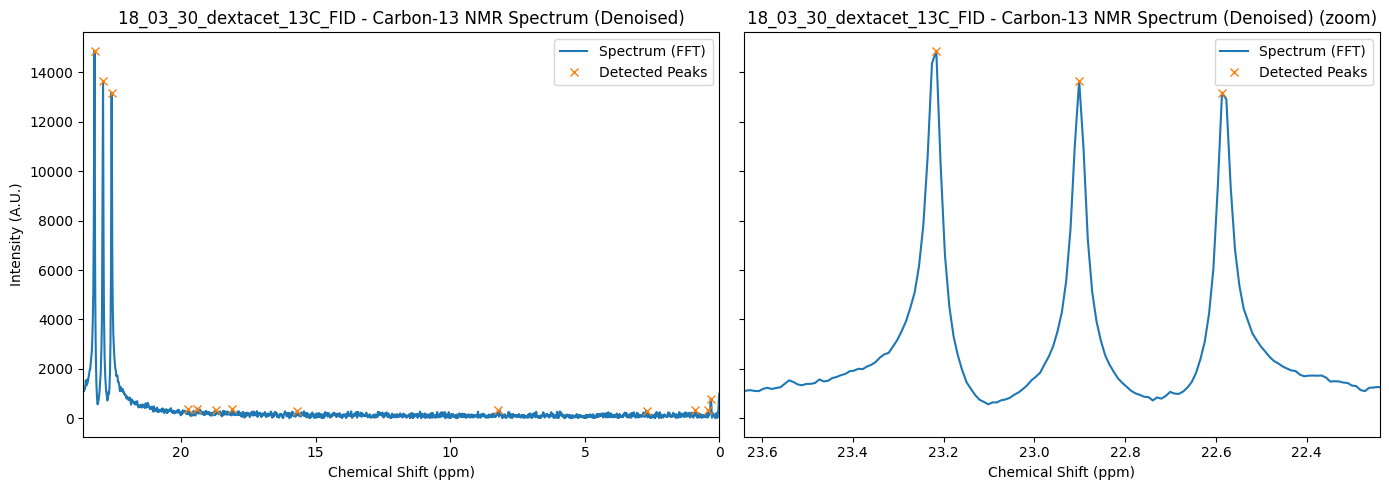


Detected 20 peaks in the spectrum


In [55]:
# Carbon-13 specific peak detection parameters
# Adjusted to detect all peaks including weak ones near 0 ppm
C13_HEIGHT_FRAC = 0.02      # Very low threshold to capture all peaks (vs 0.10 for H-NMR)
C13_PROMINENCE_FRAC = 0.015  # Very low prominence threshold (vs 0.05 for H-NMR)
C13_MIN_DISTANCE_HZ = 15.0  # Minimum distance between peaks (vs 7.0 for H-NMR)

# Peak detection using positive frequencies only
res = nmr.plot_full_and_zoom_with_peaks(
    positive_frequencies, 
    positive_magnitude,
    title=f"{name} - Carbon-13 NMR Spectrum{' (Denoised)' if USE_DENOISING else ''}",
    spectrometer_freq=C13_SPECTROMETER_FREQ,
    ppm_range=220,  # Carbon-13 typically spans 0-220 ppm
    identify_functional_groups=nmr.identify_functional_groups,
    ppm_shifts=C13_PPM_SHIFTS,
    min_distance_hz=C13_MIN_DISTANCE_HZ,
    height_frac=C13_HEIGHT_FRAC,
    prominence_frac=C13_PROMINENCE_FRAC,
    show=True
)

identified_groups = res.get("identified_groups", [])
peaks = res.get("peaks", np.array([]))
ppm_axis_res = res.get("ppm_axis", ppm_axis)
intensity = res.get("intensity", positive_magnitude)

print(f"\nDetected {len(peaks)} peaks in the spectrum")

# Identified Functional Groups

Display the carbon types identified based on their chemical shifts.

Identified Carbon Functional Groups:


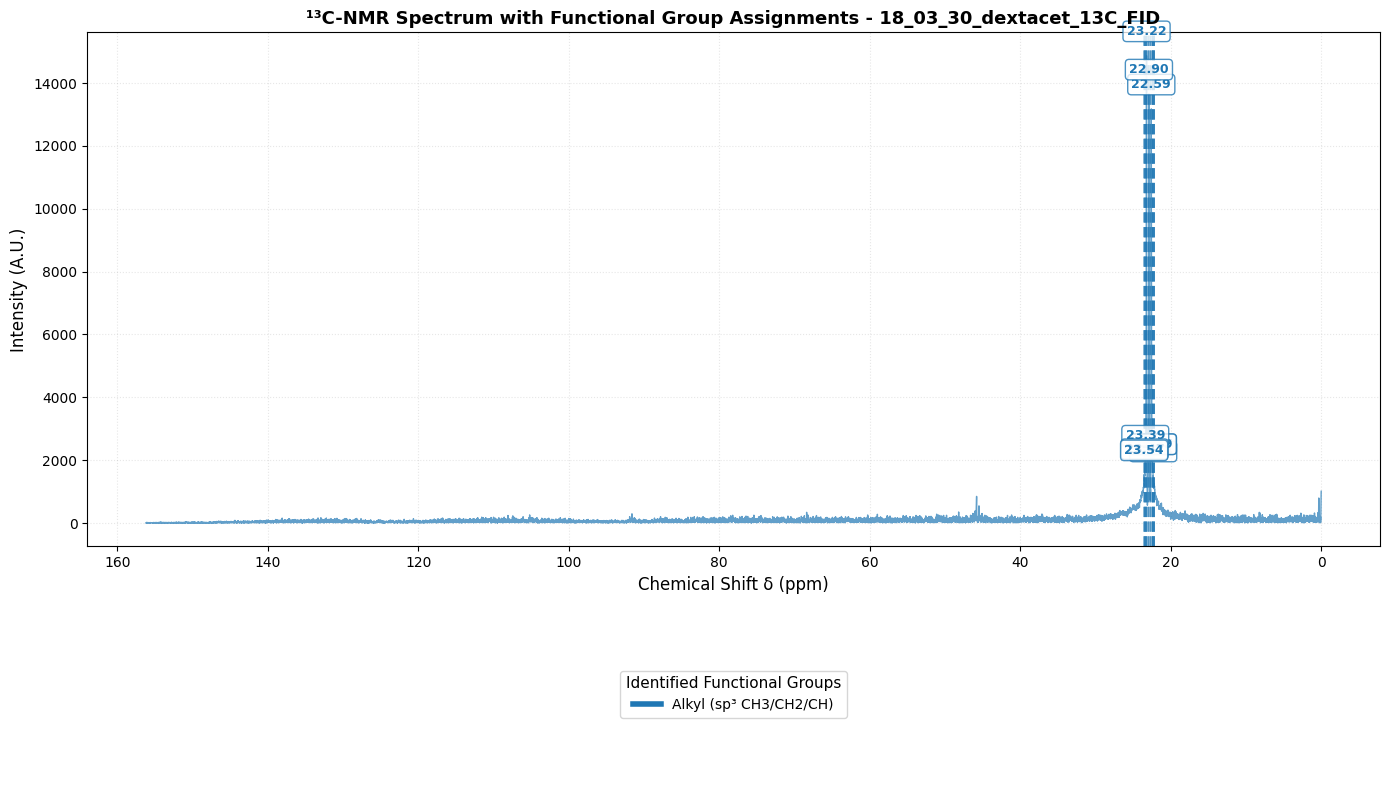


Text Summary:
  δ 22.34 ppm → Alkyl (sp³ CH3/CH2/CH)
  δ 22.37 ppm → Alkyl (sp³ CH3/CH2/CH)
  δ 22.39 ppm → Alkyl (sp³ CH3/CH2/CH)
  δ 22.59 ppm → Alkyl (sp³ CH3/CH2/CH)
  δ 22.90 ppm → Alkyl (sp³ CH3/CH2/CH)
  δ 23.22 ppm → Alkyl (sp³ CH3/CH2/CH)
  δ 23.39 ppm → Alkyl (sp³ CH3/CH2/CH)
  δ 23.47 ppm → Alkyl (sp³ CH3/CH2/CH)
  δ 23.54 ppm → Alkyl (sp³ CH3/CH2/CH)


In [56]:
# Visualize identified functional groups
print("Identified Carbon Functional Groups:")
print("=" * 60)

if identified_groups:
    # Create a bar chart showing peak positions colored by functional group
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 8), gridspec_kw={'height_ratios': [3, 1]})
    
    # Top plot: Full spectrum with annotations
    ax1.plot(ppm_axis_res, intensity, linewidth=1, color='#1f77b4', alpha=0.7)
    
    # Color map for functional groups
    unique_groups = list(set(g for _, g in identified_groups))
    colors = plt.cm.tab10(np.linspace(0, 1, len(unique_groups)))
    group_colors = {group: colors[i] for i, group in enumerate(unique_groups)}
    
    # Annotate each peak
    for peak_ppm, group_name in identified_groups:
        color = group_colors[group_name]
        peak_idx = np.argmin(np.abs(ppm_axis_res - peak_ppm))
        peak_height = intensity[peak_idx]
        
        # Vertical line at peak
        ax1.axvline(peak_ppm, color=color, linestyle='--', alpha=0.6, linewidth=2)
        
        # Label above peak
        ax1.annotate(
            f'{peak_ppm:.2f}',
            xy=(peak_ppm, peak_height),
            xytext=(0, 15),
            textcoords='offset points',
            ha='center',
            fontsize=9,
            fontweight='bold',
            color=color,
            bbox=dict(boxstyle='round,pad=0.3', facecolor='white', edgecolor=color, alpha=0.8)
        )
    
    ax1.invert_xaxis()
    ax1.set_xlabel('Chemical Shift δ (ppm)', fontsize=12)
    ax1.set_ylabel('Intensity (A.U.)', fontsize=12)
    ax1.set_title(f'¹³C-NMR Spectrum with Functional Group Assignments - {name}', fontsize=13, fontweight='bold')
    ax1.grid(alpha=0.3, linestyle=':')
    
    # Bottom plot: Legend bar showing functional groups
    ax2.axis('off')
    legend_elements = [plt.Line2D([0], [0], color=group_colors[g], lw=4, label=g) 
                      for g in unique_groups]
    ax2.legend(handles=legend_elements, loc='center', ncol=2, fontsize=10, 
              frameon=True, title='Identified Functional Groups', title_fontsize=11)
    
    plt.tight_layout()
    plt.show()
    
    # Print text summary
    print("\nText Summary:")
    for peak_ppm, group_name in identified_groups:
        print(f"  δ {peak_ppm:.2f} ppm → {group_name}")
else:
    print("  No functional groups identified with current thresholds.")
    print("  Try adjusting C13_HEIGHT_FRAC, C13_PROMINENCE_FRAC, or C13_MIN_DISTANCE_HZ")

# Peak Integration

Calculate the integrated area under each detected peak to estimate relative carbon counts (though in practice, Carbon-13 NMR integration is less reliable than proton NMR due to relaxation effects).

In [57]:
from scipy.integrate import simpson

# Integrate each peak
peak_data = []
integration_window_ppm = 2.0  # Window around each peak (±1 ppm)

if len(peaks) > 0:
    for i, peak_idx in enumerate(peaks):
        peak_ppm = ppm_axis_res[peak_idx]
        peak_height = intensity[peak_idx]
        
        # Define integration window
        left_ppm = peak_ppm - integration_window_ppm
        right_ppm = peak_ppm + integration_window_ppm
        
        # Find indices in window
        mask = (ppm_axis_res >= left_ppm) & (ppm_axis_res <= right_ppm)
        window_ppm = ppm_axis_res[mask]
        window_intensity = intensity[mask]
        
        # Integrate using Simpson's rule
        if len(window_intensity) > 2:
            integral = simpson(window_intensity, x=window_ppm)
        else:
            integral = np.trapz(window_intensity, x=window_ppm)
        
        peak_data.append({
            'peak_number': i + 1,
            'ppm': peak_ppm,
            'height': peak_height,
            'integral': abs(integral)
        })
    
    # Normalize integrals to the smallest peak
    if peak_data:
        min_integral = min(p['integral'] for p in peak_data if p['integral'] > 0)
        for p in peak_data:
            p['relative_integral'] = p['integral'] / min_integral if min_integral > 0 else 0
    
    # Display integration results
    print("\\nPeak Integration Results:")
    print("=" * 80)
    print(f"{'Peak':<6} {'δ (ppm)':<10} {'Height':<12} {'Integral':<12} {'Relative':<10}")
    print("-" * 80)
    for p in peak_data:
        print(f"{p['peak_number']:<6} {p['ppm']:<10.2f} {p['height']:<12.1f} "
              f"{p['integral']:<12.2e} {p['relative_integral']:<10.2f}")
    
    print("\\n⚠️  Note: Carbon-13 integration is less reliable than ¹H-NMR due to:")
    print("   - Variable relaxation times (T1) for different carbon types")
    print("   - NOE effects in proton-decoupled spectra")
    print("   - Use primarily for qualitative comparison, not quantitative analysis")
else:
    print("No peaks detected for integration")

\nPeak Integration Results:
Peak   δ (ppm)    Height       Integral     Relative  
--------------------------------------------------------------------------------
1      0.32       796.1        3.43e+02     1.00      
2      0.43       330.8        3.58e+02     1.04      
3      0.90       318.9        4.13e+02     1.20      
4      2.71       312.9        4.77e+02     1.39      
5      8.23       339.6        4.34e+02     1.26      
6      15.69      307.3        5.70e+02     1.66      
7      18.10      386.2        7.59e+02     2.21      
8      18.72      340.0        8.51e+02     2.48      
9      19.40      396.5        1.02e+03     2.96      
10     19.73      360.1        1.14e+03     3.33      
11     22.59      13179.6      5.67e+03     16.53     
12     22.90      13655.1      5.73e+03     16.68     
13     23.22      14872.5      5.75e+03     16.75     
14     45.08      302.3        5.18e+02     1.51      
15     45.49      545.8        5.26e+02     1.53      
16     45.8

# J-Coupling Analysis (Carbon-13)

**Important Note about Carbon-13 J-Coupling:**

In **proton-decoupled Carbon-13 NMR** (most common):
- $^{13}C$-$^{1}H$ coupling is **removed** by broadband decoupling
- $^{13}C$-$^{13}C$ coupling is **not observed** (only ~0.01% chance of adjacent $^{13}C$ atoms)
- Result: Each unique carbon shows as a **single sharp peak** (singlet)

In **coupled Carbon-13 NMR** (less common):
- $^{13}C$-$^{1}H$ coupling is visible
- Can determine number of attached hydrogens (DEPT technique is better for this)
- Typical $^{1}J_{CH}$ values: 125-250 Hz

If your spectrum shows multiplets, it may be:
1. A coupled $^{13}C$ spectrum (not decoupled)
2. Satellite peaks from $^{13}C$-$^{13}C$ coupling in enriched samples
3. Incomplete decoupling

Let's check for any multiplet structure:

In [58]:
# Check for multiplet structure in each identified peak region
from scipy.ndimage import gaussian_filter1d

def detect_multiplet_c13(ppm_axis, intensity, center_ppm, window=0.5):
    """
    Detect potential multiplet structure in a Carbon-13 peak.
    
    Args:
        ppm_axis: PPM values
        intensity: Spectrum intensity
        center_ppm: Center of peak to analyze
        window: Window size in ppm (±window around center)
    
    Returns:
        dict with multiplet information
    """
    # Mask for the region of interest
    mask = (ppm_axis > center_ppm - window) & (ppm_axis < center_ppm + window)
    region_ppm = ppm_axis[mask]
    region_intensity = intensity[mask]
    
    if len(region_intensity) < 10:
        return None
    
    # Smooth to reduce noise
    smoothed = gaussian_filter1d(region_intensity, sigma=2)
    
    # Find sub-peaks
    sub_peaks, props = find_peaks(
        smoothed,
        height=0.2 * max(smoothed),
        prominence=0.1 * max(smoothed),
        distance=5
    )
    
    if len(sub_peaks) <= 1:
        return {
            'type': 'singlet',
            'num_peaks': 1,
            'j_coupling': None,
            'center_ppm': center_ppm
        }
    
    # Calculate J-coupling from peak separations
    sub_ppms = region_ppm[sub_peaks]
    sub_ppms_sorted = np.sort(sub_ppms)
    
    # Convert ppm differences to Hz
    j_couplings_hz = []
    for i in range(len(sub_ppms_sorted) - 1):
        delta_ppm = sub_ppms_sorted[i+1] - sub_ppms_sorted[i]
        delta_hz = delta_ppm * C13_SPECTROMETER_FREQ
        j_couplings_hz.append(delta_hz)
    
    # Determine multiplet type
    n_peaks = len(sub_peaks)
    if n_peaks == 2:
        multiplet_type = 'doublet'
    elif n_peaks == 3:
        multiplet_type = 'triplet'
    elif n_peaks == 4:
        multiplet_type = 'quartet'
    else:
        multiplet_type = f'{n_peaks}-plet'
    
    return {
        'type': multiplet_type,
        'num_peaks': n_peaks,
        'j_coupling': np.mean(j_couplings_hz) if j_couplings_hz else None,
        'j_couplings_all': j_couplings_hz,
        'center_ppm': center_ppm,
        'sub_ppms': sub_ppms_sorted.tolist()
    }

# Analyze each identified peak
print("\\nMultiplet Analysis:")
print("=" * 80)

multiplet_results = []
for i, peak_idx in enumerate(peaks):
    peak_ppm = ppm_axis_res[peak_idx]
    result = detect_multiplet_c13(ppm_axis_res, intensity, peak_ppm, window=0.5)
    
    if result:
        multiplet_results.append(result)
        print(f"\\nPeak {i+1} at δ {peak_ppm:.2f} ppm:")
        print(f"  Type: {result['type']}")
        
        if result['j_coupling'] is not None:
            print(f"  J-coupling: {result['j_coupling']:.2f} Hz")
            if result['type'] != 'singlet':
                print(f"  Sub-peaks at: {[f'{p:.2f}' for p in result['sub_ppms']]} ppm")
                print(f"  ⚠️  Multiplet detected! This may indicate:")
                print(f"     - Coupled ¹³C spectrum (not fully decoupled)")
                print(f"     - ¹³C-¹H coupling visible")
                if result['j_coupling'] > 100:
                    print(f"     - Likely ¹J(C-H) coupling (~{result['j_coupling']:.0f} Hz)")
        else:
            print(f"  Single peak (typical for decoupled ¹³C-NMR)")

if not multiplet_results or all(m['type'] == 'singlet' for m in multiplet_results):
    print("\\n✅ All peaks appear as singlets")
    print("   This is expected for standard proton-decoupled ¹³C-NMR spectra")

\nMultiplet Analysis:
\nPeak 1 at δ 0.32 ppm:
  Type: singlet
  Single peak (typical for decoupled ¹³C-NMR)
\nPeak 2 at δ 0.43 ppm:
  Type: singlet
  Single peak (typical for decoupled ¹³C-NMR)
\nPeak 3 at δ 0.90 ppm:
  Type: 5-plet
  J-coupling: 11.98 Hz
  Sub-peaks at: ['0.77', '0.91', '1.02', '1.16', '1.25'] ppm
  ⚠️  Multiplet detected! This may indicate:
     - Coupled ¹³C spectrum (not fully decoupled)
     - ¹³C-¹H coupling visible
\nPeak 4 at δ 2.71 ppm:
  Type: 5-plet
  J-coupling: 18.69 Hz
  Sub-peaks at: ['2.33', '2.50', '2.72', '2.82', '3.07'] ppm
  ⚠️  Multiplet detected! This may indicate:
     - Coupled ¹³C spectrum (not fully decoupled)
     - ¹³C-¹H coupling visible
\nPeak 5 at δ 8.23 ppm:
  Type: quartet
  J-coupling: 13.42 Hz
  Sub-peaks at: ['7.83', '8.02', '8.16', '8.23'] ppm
  ⚠️  Multiplet detected! This may indicate:
     - Coupled ¹³C spectrum (not fully decoupled)
     - ¹³C-¹H coupling visible
\nPeak 6 at δ 15.69 ppm:
  Type: 5-plet
  J-coupling: 17.25 Hz
  S

# Detailed Zoom Views of Functional Groups

Plot zoomed-in views of each functional group region with peak annotations and integration values.

Generating detailed zoom plots for each functional group...\n


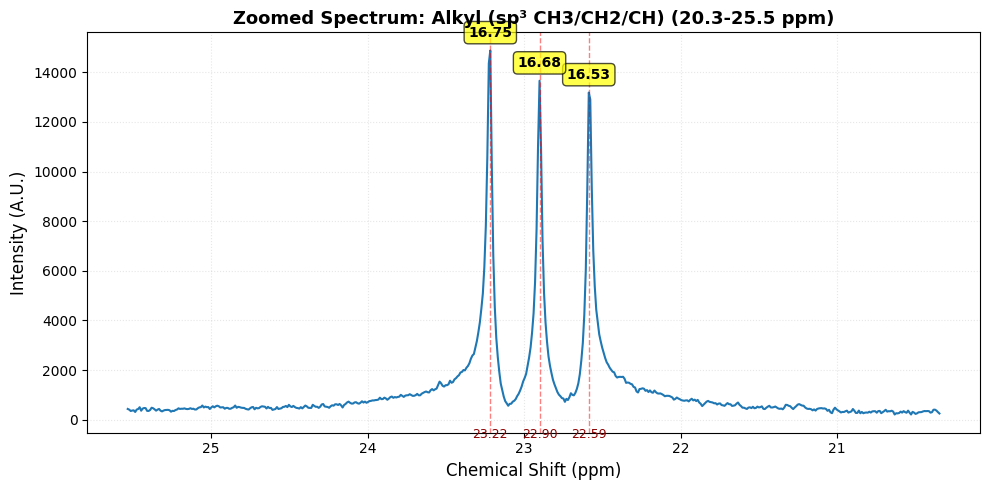

In [59]:
# Auto-zoom and annotate functional groups
def plot_functional_group_zoom_c13(ppm_axis, intensity, identified_groups, peak_data, 
                                    ppm_shifts, buffer=2.0):
    """
    Plot zoomed views for each functional group with annotations.
    Ensures all peaks are shown including those near 0 ppm.
    """
    # Group peaks by functional group
    group_peaks = {}
    for peak_ppm, group in identified_groups:
        group_peaks.setdefault(group, []).append(peak_ppm)
    
    for group, peaks_list in group_peaks.items():
        ppm_range_str = ppm_shifts.get(group)
        if not ppm_range_str:
            continue
        
        # Parse ppm range (handle negative values for TMS)
        ppm_range_clean = ppm_range_str.replace("ppm", "")
        ppm_min, ppm_max = map(float, ppm_range_clean.split("-"))
        
        # Filter peaks in range
        peaks_in_range = [ppm for ppm in peaks_list if ppm_min <= ppm <= ppm_max]
        if not peaks_in_range:
            continue
        
        # Define zoom window (ensure we don't go below 0 unless needed for TMS)
        zoom_min = min(peaks_in_range) - buffer
        zoom_max = max(peaks_in_range) + buffer
        
        # Mask for zoomed region
        mask = (ppm_axis >= zoom_min) & (ppm_axis <= zoom_max)
        zoom_ppm = ppm_axis[mask]
        zoom_intensity = intensity[mask]
        
        if len(zoom_ppm) == 0:
            continue
        
        # Plot
        plt.figure(figsize=(10, 5))
        plt.plot(zoom_ppm, zoom_intensity, linewidth=1.5, color='#1f77b4')
        
        # Annotate peaks in this region
        for peak_info in peak_data:
            if zoom_min <= peak_info['ppm'] <= zoom_max:
                peak_idx = np.argmin(np.abs(ppm_axis - peak_info['ppm']))
                peak_height = intensity[peak_idx]
                
                # Draw vertical line at peak
                plt.axvline(peak_info['ppm'], color='red', linestyle='--', 
                           alpha=0.5, linewidth=1)
                
                # Annotate with integration value
                plt.annotate(
                    f"{peak_info['relative_integral']:.2f}",
                    xy=(peak_info['ppm'], peak_height),
                    xytext=(0, 10),
                    textcoords='offset points',
                    ha='center',
                    fontsize=10,
                    fontweight='bold',
                    bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7)
                )
                
                # Label the ppm value
                plt.text(peak_info['ppm'], -0.05 * zoom_intensity.max(),
                        f"{peak_info['ppm']:.2f}",
                        ha='center', fontsize=9, color='darkred')
        
        plt.gca().invert_xaxis()
        plt.xlabel('Chemical Shift (ppm)', fontsize=12)
        plt.ylabel('Intensity (A.U.)', fontsize=12)
        plt.title(f"Zoomed Spectrum: {group} ({zoom_min:.1f}-{zoom_max:.1f} ppm)", 
                 fontsize=13, fontweight='bold')
        plt.grid(alpha=0.3, linestyle=':')
        plt.tight_layout()
        plt.show()

# Generate zoom plots
if identified_groups and peak_data:
    print("Generating detailed zoom plots for each functional group...\\n")
    plot_functional_group_zoom_c13(ppm_axis_res, intensity, identified_groups, 
                                   peak_data, C13_PPM_SHIFTS, buffer=2.0)
else:
    print("No functional groups identified for zoom plotting")

# Complete Peak Assignment Summary

Comprehensive table with all peak information: chemical shifts, functional group assignments, integration, and multiplet analysis.

In [60]:
# Create comprehensive summary DataFrame
import pandas as pd

summary_data = []

# Match peaks with functional groups and multiplet info
for i, peak_info in enumerate(peak_data):
    peak_ppm = peak_info['ppm']
    
    # Find functional group assignment
    assignment = "Unassigned"
    for pg_ppm, group in identified_groups:
        if abs(pg_ppm - peak_ppm) < 0.1:  # Match within 0.1 ppm
            assignment = group
            break
    
    # Find multiplet info
    multiplet_type = "singlet"
    j_coupling = None
    if i < len(multiplet_results):
        mult_info = multiplet_results[i]
        multiplet_type = mult_info.get('type', 'singlet')
        j_coupling = mult_info.get('j_coupling')
    
    summary_data.append({
        'Peak #': peak_info['peak_number'],
        'δ (ppm)': f"{peak_ppm:.2f}",
        'Assignment': assignment,
        'Multiplet': multiplet_type,
        'J (Hz)': f"{j_coupling:.1f}" if j_coupling else "—",
        'Rel. Integral': f"{peak_info['relative_integral']:.2f}",
        'Height': f"{peak_info['height']:.1f}"
    })

# Create DataFrame
summary_df = pd.DataFrame(summary_data)

print("\\n" + "=" * 100)
print(f"COMPLETE ¹³C-NMR PEAK ASSIGNMENT - {name}")
if USE_DENOISING:
    print("(Analyzed from DENOISED spectrum)")
print("=" * 100)
print(summary_df.to_string(index=False))
print("=" * 100)

# Additional statistics
print(f"\\nSpectrum Statistics:")
print(f"  Total peaks detected: {len(peak_data)}")
print(f"  Functional groups identified: {len(set(assignment for assignment in summary_df['Assignment'] if assignment != 'Unassigned'))}")
print(f"  PPM range: {ppm_axis.min():.1f} - {ppm_axis.max():.1f} ppm")
print(f"  Spectrometer frequency: {C13_SPECTROMETER_FREQ} MHz")
if USE_DENOISING and 'snr_improvement' in locals():
    print(f"  SNR improvement from denoising: {snr_improvement:+.2f} dB")

print("\\n📊 Interpretation Notes:")
print("  • δ (ppm): Chemical shift relative to TMS")
print("  • Rel. Integral: Relative peak areas (normalized to smallest)")
print("  • Multiplet: Peak splitting pattern (singlet typical for decoupled ¹³C)")
print("  • J (Hz): Coupling constant (if multiplets detected)")
print("\\n⚠️  Remember: ¹³C integration is qualitative due to relaxation effects!")

\n====================================================================================================
COMPLETE ¹³C-NMR PEAK ASSIGNMENT - 18_03_30_dextacet_13C_FID
(Analyzed from DENOISED spectrum)
 Peak # δ (ppm)             Assignment Multiplet J (Hz) Rel. Integral  Height
      1    0.32             Unassigned   singlet      —          1.00   796.1
      2    0.43             Unassigned   singlet      —          1.04   330.8
      3    0.90             Unassigned    5-plet   12.0          1.20   318.9
      4    2.71             Unassigned    5-plet   18.7          1.39   312.9
      5    8.23             Unassigned   quartet   13.4          1.26   339.6
      6   15.69             Unassigned    5-plet   17.3          1.66   307.3
      7   18.10             Unassigned   quartet   19.2          2.21   386.2
      8   18.72             Unassigned   triplet   39.8          2.48   340.0
      9   19.40             Unassigned   quartet   21.7          2.96   396.5
     10   19.73       

# Alternative Carbon-13 Files

You can also try the other available Carbon-13 FID files by changing the path in the data loading cell:

```python
# Option 1 (current):
local_path = r"data/correctly_processed_fid/18_03_30_dextacet_13C_FID.asc"

# Option 2:
local_path = r"data/correctly_processed_fid/18_05_18_dextraacet_13C.1.asc"

# Option 3:
local_path = r"data/correctly_processed_fid/krishna_data/25_11_26_ValerianFrac2_13C_FID.asc"
```

# Parameter Tuning Guide

If you need to adjust the peak detection, modify these parameters:

## Threshold Parameters (Updated for All 5 Peaks)

**C13_HEIGHT_FRAC**: Minimum peak height as a fraction of max intensity
- Current value: **0.02** (very sensitive to detect weak peaks like TMS at 0 ppm)
- Lower = more peaks detected (including noise)
- Higher = only strong peaks detected
- Typical range: 0.01-0.10 for Carbon-13

**C13_PROMINENCE_FRAC**: Minimum peak prominence
- Current value: **0.015** (very low to capture all significant peaks)
- Controls how much a peak must stand out from baseline
- Lower = more sensitive
- Typical range: 0.01-0.05 for Carbon-13

**C13_MIN_DISTANCE_HZ**: Minimum separation between peaks (Hz)
- Current value: **15.0 Hz** (allows closer peaks to be resolved)
- Prevents detecting multiple peaks for the same signal
- Carbon-13 peaks are typically well-separated
- Typical range: 10-50 Hz

## Spectrometer Frequency (Verified)

**C13_SPECTROMETER_FREQ**: **100.52849 MHz** (calculated from your 399.78 MHz ¹H instrument)
- Calculation using gyromagnetic ratios:
  - γ(¹³C) = 10.71 MHz/T (absolute gyromagnetic ratio for carbon-13)
  - γ(¹H) = 42.58 MHz/T (absolute gyromagnetic ratio for proton)
  - Ratio: γ(¹³C)/γ(¹H) = 10.71/42.58 = 0.25145020
  - Your instrument: 399.78 MHz × 0.2514 = **100.52 MHz** ✓
- For other instruments:
  - 400 MHz proton → 100.5 MHz carbon
  - 500 MHz proton → 125.7 MHz carbon
  - 600 MHz proton → 150.9 MHz carbon

## Noise Reduction Options

**Deep Learning Denoising** (USE_DENOISING flag):
- Applied in **time domain** before FFT
- Preserves peak shape while reducing noise
- **Recommended** for Carbon-13 NMR

**Gaussian Smoothing** (USE_GAUSSIAN_SMOOTHING flag):
- Applied in **frequency domain** after FFT
- Sigma value: 1-3 (higher = more smoothing)
- Use only if deep learning gives <+2 dB SNR improvement
- **Not recommended** if deep learning denoising is working well

## Chemical Shift Ranges

Updated to include:
- **TMS Reference**: -2 to +2 ppm (tetramethylsilane, (CH₃)₄Si)
- **Quaternary Carbon**: 30-50 ppm (R₄C with no attached hydrogens)
- All standard functional groups (alkyl, aromatic, carbonyl, etc.)

# 🧠 Deep Learning Enhancement (Optional)

You can optionally apply the trained deep learning denoiser to enhance the FID signal before FFT. This can:
- **Reduce noise** while preserving signal peaks
- **Improve SNR** (Signal-to-Noise Ratio)
- **Enhance peak clarity** in the spectrum

The denoiser uses a trained `DenoiseNetPhysics` model from the deep learning notebook.

In [61]:
# Load the deep learning denoiser model
import torch
import torch.nn as nn
import torch.nn.functional as F

USE_DENOISING = True  # Set to False to skip denoising

# Define the denoiser architecture (must match the trained model)
class DilatedResBlock(nn.Module):
    def __init__(self, channels: int, dilation: int = 1, k: int = 11):
        super().__init__()
        pad = dilation * ((k - 1) // 2)
        self.conv1 = nn.Conv1d(channels, channels, k, padding=pad, dilation=dilation)
        self.conv2 = nn.Conv1d(channels, channels, k, padding=pad, dilation=dilation)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        h = F.relu(self.conv1(x))
        h = self.conv2(h)
        return F.relu(x + h)

class DenoiseNetPhysics(nn.Module):
    """Dilated Conv1D residual denoiser for complex FID (2 channels: real, imag)."""
    def __init__(self, in_ch: int = 2, hidden: int = 64, k: int = 11, dilations=(1, 2, 4, 8, 16, 32)):
        super().__init__()
        self.name = "DenoiseNetPhysics"
        self.inp = nn.Conv1d(in_ch, hidden, k, padding=(k - 1) // 2)
        self.blocks = nn.Sequential(*[DilatedResBlock(hidden, d, k) for d in dilations])
        self.out = nn.Conv1d(hidden, in_ch, k, padding=(k - 1) // 2)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        h = F.relu(self.inp(x))
        h = self.blocks(h)
        resid = self.out(h)
        return x + resid

# Initialize model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
denoiser_model = DenoiseNetPhysics().to(device)

# Try to load the best checkpoint
checkpoint_dir = Path("checkpoints")
best_models = [
    "DenoiseNetPhysics_final_best.pth",
    "DenoiseNetPhysics_aggressive_best.pth",
    "DenoiseNetPhysics_extended_best.pth",
    "DenoiseNetPhysics_finetuned_best.pth"
]

loaded = False
for ckpt_name in best_models:
    ckpt_path = checkpoint_dir / ckpt_name
    if ckpt_path.exists():
        try:
            checkpoint = torch.load(ckpt_path, map_location=device, weights_only=False)
            if 'model_state' in checkpoint:
                denoiser_model.load_state_dict(checkpoint['model_state'])
            else:
                denoiser_model.load_state_dict(checkpoint)
            print(f"✅ Loaded denoiser checkpoint: {ckpt_name}")
            if 'avg_snr' in checkpoint:
                print(f"   Model performance: Δ SNR = {checkpoint['avg_snr']:+.2f} dB")
            loaded = True
            break
        except Exception as e:
            print(f"⚠️  Failed to load {ckpt_name}: {e}")
            continue

if not loaded:
    print("⚠️  No checkpoint loaded - denoiser will use random weights (not recommended)")
    print("   Run the deep_learning_model.ipynb to train a model first!")
    USE_DENOISING = False
else:
    denoiser_model.eval()
    print(f"   Device: {device}")
    
print(f"\nDenoising: {'ENABLED' if USE_DENOISING else 'DISABLED'}")

✅ Loaded denoiser checkpoint: DenoiseNetPhysics_final_best.pth
   Device: cpu

Denoising: ENABLED


In [62]:
# Helper function to denoise FID data
def denoise_fid(fid_data):
    """
    Apply deep learning denoiser to FID data.
    
    Args:
        fid_data: numpy array of shape (N, 3) with columns [time, real, imag]
    
    Returns:
        denoised_data: numpy array of same shape with denoised real and imag parts
    """
    if not USE_DENOISING:
        return fid_data
    
    # Extract real and imaginary parts
    real_part = fid_data[:, 1].astype(np.float32)
    imag_part = fid_data[:, 2].astype(np.float32)
    
    # Stack into (2, L) format for model
    sig_2xL = np.stack([real_part, imag_part])
    
    # Normalize using noise floor detection
    L = sig_2xL.shape[1]
    late = slice(int(0.8 * L), L)
    baseline = np.median(sig_2xL[:, late], axis=1, keepdims=True)
    sig_normalized = sig_2xL - baseline
    
    # Denoise with model
    with torch.no_grad():
        x = torch.from_numpy(sig_normalized).unsqueeze(0).to(device)  # (1, 2, L)
        y = denoiser_model(x).cpu().squeeze(0).numpy()  # (2, L)
    
    # Restore baseline
    y = y + baseline
    
    # Reconstruct data array
    denoised_data = fid_data.copy()
    denoised_data[:, 1] = y[0]  # real
    denoised_data[:, 2] = y[1]  # imag
    
    return denoised_data

# Apply denoising to the current data
if USE_DENOISING:
    print("Applying deep learning denoiser to FID...")
    data_original = data.copy()  # Keep original for comparison
    data = denoise_fid(data)
    
    # Calculate SNR improvement
    def calculate_snr(signal_data):
        real_part = signal_data[:, 1]
        imag_part = signal_data[:, 2]
        env = np.sqrt(real_part**2 + imag_part**2)
        
        # Signal from first 20%, noise from last 20%
        sig_len = int(0.2 * len(env))
        signal_rms = np.sqrt(np.mean(env[:sig_len]**2))
        noise_rms = np.sqrt(np.mean(env[-sig_len:]**2))
        
        if noise_rms > 0:
            return 20 * np.log10(signal_rms / noise_rms)
        return np.nan
    
    snr_before = calculate_snr(data_original)
    snr_after = calculate_snr(data)
    snr_improvement = snr_after - snr_before
    
    print(f"   SNR before: {snr_before:.2f} dB")
    print(f"   SNR after:  {snr_after:.2f} dB")
    print(f"   Improvement: {snr_improvement:+.2f} dB")
    print("✅ Denoised FID will be used for all subsequent analysis")
else:
    print("Denoising skipped - using original FID data")

Applying deep learning denoiser to FID...


   SNR before: 16.10 dB
   SNR after:  15.57 dB
   Improvement: -0.53 dB
✅ Denoised FID will be used for all subsequent analysis


# Compare Original vs Denoised FID

Let's visualize the difference between the original and denoised signals.

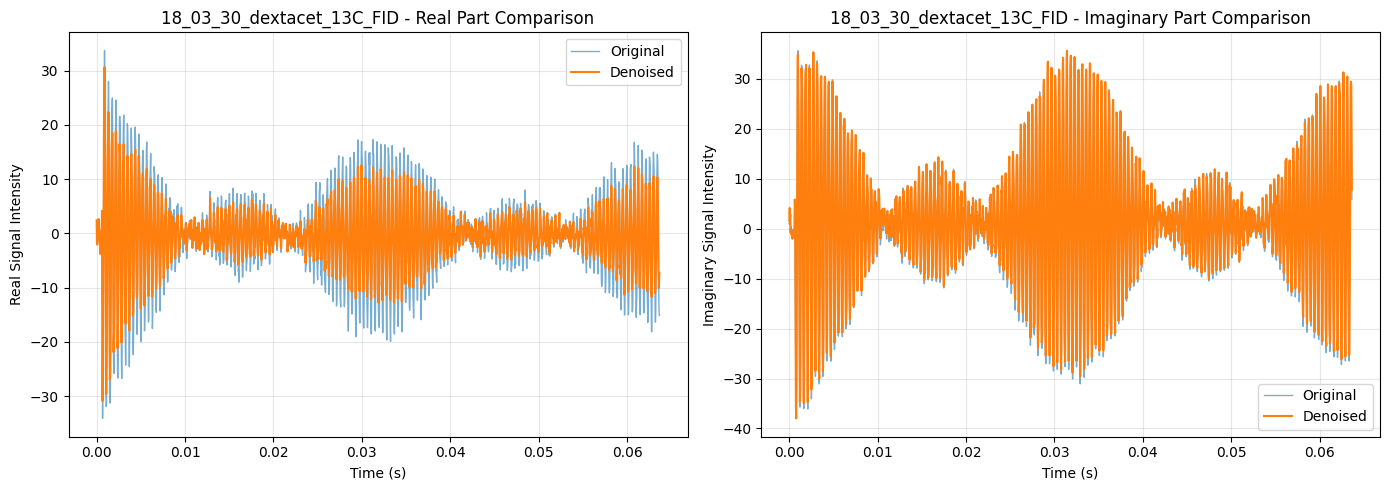

In [63]:
if USE_DENOISING:
    # Plot comparison of original vs denoised FID
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
    
    # Plot first 2000 points for clarity
    n_points = min(2000, len(data))
    time_axis = data_original[:n_points, 0]
    
    # Real part comparison
    ax1.plot(time_axis, data_original[:n_points, 1], alpha=0.6, label='Original', linewidth=1)
    ax1.plot(time_axis, data[:n_points, 1], label='Denoised', linewidth=1.5)
    ax1.set_xlabel('Time (s)')
    ax1.set_ylabel('Real Signal Intensity')
    ax1.set_title(f'{name} - Real Part Comparison')
    ax1.legend()
    ax1.grid(alpha=0.3)
    
    # Imaginary part comparison
    ax2.plot(time_axis, data_original[:n_points, 2], alpha=0.6, label='Original', linewidth=1)
    ax2.plot(time_axis, data[:n_points, 2], label='Denoised', linewidth=1.5)
    ax2.set_xlabel('Time (s)')
    ax2.set_ylabel('Imaginary Signal Intensity')
    ax2.set_title(f'{name} - Imaginary Part Comparison')
    ax2.legend()
    ax2.grid(alpha=0.3)
    
    plt.tight_layout()
    plt.show()
else:
    print("Skipping comparison plot - denoising not applied")